In [1]:
import sys
import string
import matplotlib.pyplot as plt
import numpy as np
import json

# Global Variables
datatype_count = {
    'text': 0,
    'date': 0,
    'int': 0,
    'real': 0
}
type_label = ["DATE/TIME", "TEXT", "INTEGER (LONG)", "REAL"]

In [2]:
def get_dataset_meta(dataset_name):
    with open(dataset_name, 'r') as fin:
        dataset = json.load(fin)
        
        num_columns = len(dataset['columns'])
        num_sparse_col = 0
        if 'columns' in dataset:
            for col in dataset['columns']:
                # Type Count
                get_type_count(col)
                # Sparcity
                # fill_ratio = get_sparcity_score(col)
                #if fill_ratio > 0.5 :
                    # this column is less than half-filled
                #    num_sparse_col += 1
                # Cleanliness
        else:
            print(f"dataset {dataset_name} doesn't have columns!\n")


In [3]:
def get_type_count(col):
    global datatype_count, type_label
    for type_meta in col['data_types']: # array
        if type_meta['type'] == type_label[0]:
            datatype_count['date'] += type_meta['count']
        elif type_meta['type'] == type_label[1]:
            datatype_count['text'] += type_meta['count']
        elif type_meta['type'] == type_label[2]:
            datatype_count['int'] += type_meta['count']
        elif type_meta['type'] == type_label[3]:
            datatype_count['real'] += type_meta['count']

In [4]:
def get_sparcity_score(col):
    # Calculating Sparcity
    # Note: Definition of sparcity of dataset
    # There are two possible "sparcity" for a given dataset:
    #  1. Many fully-filled columns + many empty columns
    #  2. Most columns are half-filled
    # Here for the first case, we do not regard it as a "sparse" dataset
    # since its empty columns can be easily removed, making it a dense matrix;
    # thus only the second case is regard as "sparse" dataset since we can not 
    # really remove any of its columns
    num_non_empty_cells = col['number_non_empty_cells']
    num_empty_cells = col['number_empty_cells']
    fill_ratio = num_empty_cells / (num_empty_cells + num_non_empty_cells)
    return fill_ratio

In [5]:
def get_cleanliness_score(col):
    # Calculate dataset cleaness
    # Note: Definition of cleaness of dataset
    # Normally, a correctly filled column should belong to one specific datatype.
    # That is, a column should either be text or integer, not both. So if a column
    # has values of more than one data type, it's possible that the column is 
    # not correctly filled, especially if the ratio of number of values of each type
    # is not low. 
    num_data_types = len(col['data_types'])
    if num_data_types > 1:
        pass
        #for dt in col['data_types']:
    else:
        return 1

In [6]:
# init file path
# 
from os import listdir
from os.path import isfile, join
path = './result'
dataset_names = [join(path,f) for f in listdir(path) if isfile(join(path,f))]

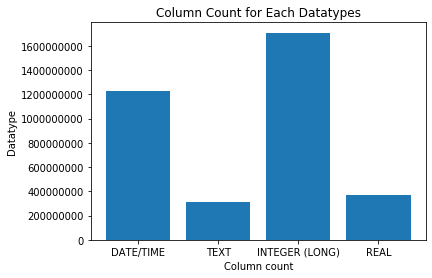

In [13]:
# main pipeline

for dataset_name in dataset_names:
    if dataset_name.split('.')[-1] == 'json':
        get_dataset_meta(dataset_name)

# Q1 - for each data type, how many columns contain that type?
# Possible types: [DATE/TIME, TEXT, INTEGER, REAL,]
# Use bar graph
global datatype_count, type_label
x = type_label
y = list(datatype_count.values())
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_title("Column Count for Each Datatypes")
ax.set_xlabel('Column count')
ax.set_ylabel('Datatype')
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [ ]:
# Q2 - type associations
